# <center>LAB5 tutorial for Machine Learning <br > Decision Tree and Random Forest</center>
## LAB Assignment  <!-- 眭和 -->
This lab introduces classical machine learning algorithms, decision trees (DTs) and their ensemble learning (e.g., Random Forests). Decision trees are important non-parameter learning methods. Although DTs are simple and limited, they still can achieve excellent performance using ensemble learning schemes.

For this lab assignment, we'll use the algorithms we've learned today to fit the model and evaluate the model’s prediction performance. The scikit-learn package will be used to save your time.

### Decision tree
- <font size=4>Step 1. load iris dataset </font>

Datasets: First, we load the scikit-learn iris toy dataset .

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.evaluate import bias_variance_decomp
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
iris = datasets.load_iris()

- <font size=4> Step 2. Define the features and the target </font>

In [25]:
X = iris.data[:,2:]
y = iris.target

- <font size=4> Step 3. Visualization </font>
  
    We need to use proper visualization methods to have an intuitive understanding.

    For visualization, only the last 2 attributes are used.

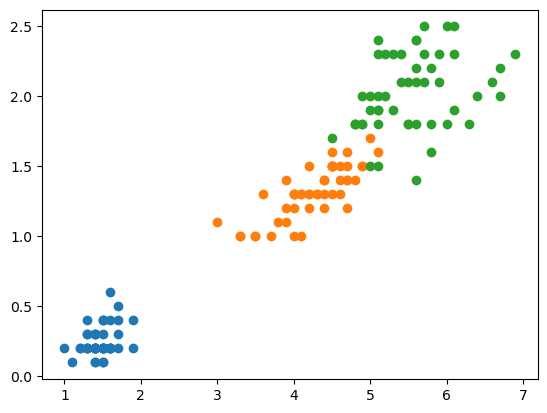

In [26]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

- <font size=4> Step 4. Preprocessing data </font>
Please check whether the data needs to be preprocessed

In [27]:
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


- <font size=4> Step 5. Split the dataset into train and test sets </font>
  
 Now we divide the whole dataset into a training set and a test set using the the scikit-learn model_selection module.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

- <font size=4> Step 6. Explore the model parameters </font>
  
Decision trees are quite easy to use, but they are prone to overfit the training data. Actually almost all the non-parameter learning methods suffer from this problem. We can use pruning to optimize our trained decision trees; we can also adjust the super parameters to avoid overfitting.

The decision tree model  given by the `SkLearn`  is as follows:

```python
DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
```
There are so many arguments and they are all helpful in adjusting the algorithm parameters to achieve the balance between bias and variance.  
Adjust these parameters: `criterion`,`max_depth`, `min_samples_leaf`,  `min_samples_split` , `max_leaf_nodes `,`min_impurity_split `
and explain how it affects the bias and variance of the classification results. 


In [29]:
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier()
param_grid = {
        'criterion' : ["gini", "entropy", "log_loss"],
        'max_depth' : range(1, 10, 1),
        'min_samples_leaf' : range(1, 10, 1),
        'min_samples_split' : range(2, 10, 1),
        'min_impurity_decrease' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    }
grid_search = GridSearchCV(tree, param_grid, cv=10)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


{'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.975


Therefore, the criterion should choose criterion: gini, max_depth: 3, min_samples_leaf = 1,min_samples_split = 3, min_impurity_decrease = 0.0

- <font size=4> Step 7. Use the model of your choice on the test set </font>

In [36]:
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
model.fit(X_train, y_train)
pred = model.predict(X_test)

- <font size=4> Step 8. Evaluate the model </font>

In [37]:
print(accuracy_score(pred, y_test))
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=None,num_rounds=10)
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

0.9666666666666667
Average Expected Loss: 0.0367
Average Bias: 0.0333
Average Variance: 0.0033


- <font size=4> Step 9. Visual decision boundary and generated decision tree </font>

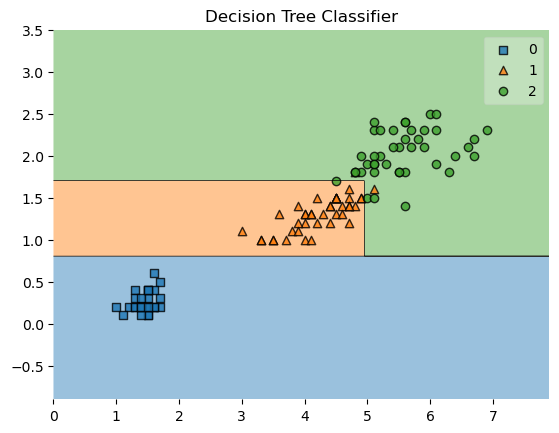

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, clf=model)
plt.title('Decision Tree Classifier')
plt.show()	

### Random forest

In this section, you are required to use random forests for classification. Thus, in `scikit-learn`, there are two ways to implement a random forset, from the Bagging view and from the RF view.<br>
Classify `iris`  using `BaggingClassifier( )` and `RandomForestClassifier( )` respectively, 
- Compare the performances of two  methods, and select different parameters for model  and evaluate the model using bias and variance




In [40]:
from sklearn.ensemble import RandomForestClassifier
print('Random Forest:')
rf_clf = RandomForestClassifier(n_estimators=300,
                                random_state=666, # random attributes subset
                                oob_score=True,
                                # n_jobs=-1
                               )
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(pred, y_test))
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(rf_clf, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')
from sklearn.ensemble import BaggingClassifier
print('Bagging')
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=300,
                                # max_samples=300,
                                bootstrap=True, # using bootstrap sampling method
                                oob_score=True, # use oob data for scoring
                                # n_jobs=-1 # use paralell computing
                               )
bagging_clf.fit(X_train,y_train)
pred = bagging_clf.predict(X_test)
print(accuracy_score(pred, y_test))
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(bagging_clf, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

Random Forest:
0.9666666666666667
Average Expected Loss: 0.04
Average Bias: 0.0333
Average Variance: 0.0067
Bagging
0.9333333333333333
Average Expected Loss: 0.0467
Average Bias: 0.0333
Average Variance: 0.0133


### Other ensemble learning
For classification, we have many models to choose . Please don't just pick a model to train and say it's good enough. We need to select models based on some metrics, such as choosing models with low bias and low variance.

In this part, you are required  to use `AdaBoost` and `Gradient boosting`.Compare their performances with decision tree and random forest, and finally select the best model  and the optimal  parameters for iris classification.


In [41]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)

print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

0.9333333333333333
Average Expected Loss: 0.0467
Average Bias: 0.0333
Average Variance: 0.0133


In [42]:
from sklearn.ensemble  import GradientBoostingClassifier

clf =  GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)

print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

0.9333333333333333
Average Expected Loss: 0.0467
Average Bias: 0.0333
Average Variance: 0.0133


Comparing these models, Random Forest has better performance.

### Questions:
(1) Can decision trees and random forests be used for unsupervised clustering or data dimension reduction? Why?

Decision trees and random forests can't used for unsupervised clustering since it need the true label to learn how to classify the data. Dicision trees can be used for data dimension reduction. The dimension is reducing when making decisions.

(2) What are the strengths of the decision tree/random forest methods; when do they perform well?

The decision tree is fast to excute, and the random forest is good at preventing overfitting.

(3) What are the weaknesses of the decision tree/random forest methods; when do they perform poorly?

Decision tree is easy to overfit, and the random forest is time-consuming.

(4) What makes the decision tree/random forest a good candidate for the classification/regression problem, if you have enough knowledge about the data?

When there is little dependency among the features, and the data is of high dimension, the decision tree/random forest is a good candidate for the problem.